In [10]:
import pandas as pd
import numpy as np
import re
import itertools
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
%cd drive/MyDrive/Colab\ Notebooks/data

/content/drive/MyDrive/Colab Notebooks/data


In [21]:
%cd data/

/content/drive/My Drive/Colab Notebooks/data


In [ ]:
df_new = pd.read_csv('adverse_summary_mod.csv')
df_new.head(3)

In [ ]:
df_new.drop(['Unnamed: 0'], axis=1, inplace=True)

**Preprocess Text**

1. Remove reference notations:

In [ ]:
pattern = r"\[[\d,\s]*\]"
txt = re.sub(pattern, '', df_new.loc[0]['Text'])
txt

2. Remove punctuations with space:

In [ ]:
txt = ' '.join(re.sub("[\,\!\?\:\;\-\=\<\>\≦\≧\#\~]", " ", txt).split())
txt

In [ ]:
txt = re.sub(r'\s*\.', '. ', txt)
txt

3. Remove (0 :

In [ ]:
txt = re.sub(r'\(0', '', txt)
txt

4. Remove URLs:

In [ ]:
txt = ' '.join(re.sub("(\w+:\/\/\S+)", " ", txt).split())
txt

5. Lowercase:

In [ ]:
txt = txt.lower()
txt

6. Fix misspelled words:

In [ ]:
txt = ''.join(''.join(s)[:2] for _, s in itertools.groupby(txt))
txt

In [ ]:
def preprocess(txt):
  # Handle NaN
  if pd.isna(txt):
    return txt
  
  # Remove reference notations
  txt = re.sub(r"\[[\d,\s]*\]", '', txt)
  # Remove (0
  txt = re.sub(r'\(0', '', txt)
  # Replace '.' with space
  txt = re.sub(r'\s*\.', '. ', txt)
  # Lowercase
  txt = txt.lower()
  # Remove punctuations and numbers with space
  txt = re.sub("[^A-Za-z\. ]", " " , txt)
  # Remove URLs
  txt = re.sub("(\w+:\/\/\S+)", " ", txt)
  # Fix misspelled words
  txt = ''.join(''.join(s)[:2] for _, s in itertools.groupby(txt))
  # Remove extra spaces
  txt = re.sub(r'\s+', " ", txt)

  return txt

In [ ]:
preprocess(df_new.loc[0]['Text']) #encoderr-decoder , seq2seq model (LSTMs), 70-10-20, 

'trial of labor after cesarean delivery tolac in japan rates and complications. to determine the rates of trial of labor after cesarean delivery tolac and complications in japan. rates of tolac were investigated by facility type and we calculated the rates of maternal and perinatal complications including uterine rupture in tolac. with regard to complications we identified eight cases. conclusion the tolac rate in japan was considerably lower than that reported in other countries despite comparable complication rates. on the other hand concern is widespread about complications in tolac including uterine rupture. national institutes of health nih has conducted a systematic review of these complications and indicated that tolac is a reasonable option for many women and has encouraged medical institutions to facilitate access to tolac. japanese rates of tolac and associated complications remain unclear. many studies from the united states and elsewhere have focused on complications but cl

In [ ]:
df_new['txt_clean'] = df_new['Text'].apply(preprocess)

In [22]:
df_new = pd.read_csv('adverse_clean.csv')

**fastText**

In [12]:
%cd ../fastText/

/content/drive/MyDrive/Colab Notebooks/fastText


In [17]:
# !git clone https://github.com/facebookresearch/fastText.git
%cd fastText
!sudo pip install .

[Errno 2] No such file or directory: 'fastText'
/content/drive/MyDrive/Colab Notebooks/fastText
Processing /content/drive/My Drive/Colab Notebooks/fastText
  DEPRECATION: A future pip version will change local packages to be built in-place without first copying to a temporary directory. We recommend you use --use-feature=in-tree-build to test your packages with this new behavior before it becomes the default.
   pip 21.3 will remove support for this functionality. You can find discussion regarding this at https://github.com/pypa/pip/issues/7555.
  Using cached pybind11-2.7.1-py2.py3-none-any.whl (200 kB)
  Created wheel for fasttext: filename=fasttext-0.9.2-cp37-cp37m-linux_x86_64.whl size=3082146 sha256=2742fce5a918b962c0d2f6d9b30765180233db3cdf2a5e37b29481daec2f1a94
  Stored in directory: /tmp/pip-ephem-wheel-cache-n4b69fce/wheels/79/2d/d8/7c11b7753e2835286ebc5528f4a3a8730504305facf670b4ca
Successfully built fasttext


In [18]:
import fasttext
import fasttext.util

# download model
# fasttext.util.download_model('en', if_exists='ignore')  # English
try:
  ft = fasttext.load_model('sogou_news.bin')
except ValueError:
  print('Model not found.')

In [ ]:
# reduce model
fasttext.util.reduce_model(ft, 100)
ft.save_model('dbpedia.bin')

In [29]:
df_new['label'] = df_new['txt_clean'].apply(lambda x: 'No_text' if pd.isna(x) else ft.predict(x, k=1)[0][0])

(array([3113.,    0., 1697.,    0., 1806.,    0.,   40.,    0.,  113.,
          56.]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <a list of 10 Patch objects>)

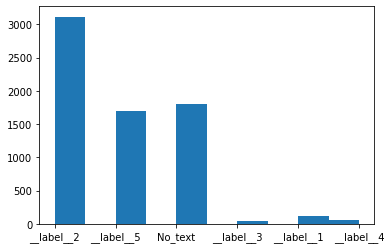

In [32]:
plt.hist(df_new['label'])

In [43]:
df_new.loc[0]['label']

'__label__2'

In [42]:
df_new.loc[0]['txt_clean']

'trial of labor after cesarean delivery tolac in japan rates and complications. to determine the rates of trial of labor after cesarean delivery tolac and complications in japan. rates of tolac were investigated by facility type and we calculated the rates of maternal and perinatal complications including uterine rupture in tolac. with regard to complications we identified eight cases. conclusion the tolac rate in japan was considerably lower than that reported in other countries despite comparable complication rates. on the other hand concern is widespread about complications in tolac including uterine rupture. national institutes of health nih has conducted a systematic review of these complications and indicated that tolac is a reasonable option for many women and has encouraged medical institutions to facilitate access to tolac. japanese rates of tolac and associated complications remain unclear. many studies from the united states and elsewhere have focused on complications but cl

In [44]:
df_new.loc[1]['label']

'__label__5'

In [45]:
df_new.loc[1]['txt_clean']

'visual symptoms are well recognized as a side effect of sildenafil when used for erectile dysfunction. '



---



In [ ]:
from gensim import corpora, models, similarities

In [ ]:
doc = [
    "Human machine interface for lab abc computer applications"
]

In [ ]:
texts = [
    [word for word in document.lower().split()] for document in doc
]

In [ ]:
dictionary = corpora.Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]

In [ ]:
lsi = models.LsiModel(corpus, id2word=dictionary, num_topics=2)

In [ ]:
doc = "Human computer interaction"
vec_bow = dictionary.doc2bow(doc.lower().split())
vec_lsi = lsi[vec_bow]  # convert the query to LSI space
print(vec_lsi)

[(0, 0.7559289460184545)]


In [ ]:
index = similarities.MatrixSimilarity(lsi[corpus])

In [ ]:
sims = index[vec_lsi]
print(list(enumerate(sims)))

[(0, 1.0)]




---



In [1]:
import nltk
import re

In [2]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

**Preprocessing**

In [ ]:
article_text = "trial of labor after cesarean delivery tolac in japan rates and complications. to determine the rates of trial of labor after cesarean delivery tolac and complications in japan. rates of tolac were investigated by facility type and we calculated the rates of maternal and perinatal complications including uterine rupture in tolac. with regard to complications we identified eight cases. conclusion the tolac rate in japan was considerably lower than that reported in other countries despite comparable complication rates. on the other hand concern is widespread about complications in tolac including uterine rupture. national institutes of health nih has conducted a systematic review of these complications and indicated that tolac is a reasonable option for many women and has encouraged medical institutions to facilitate access to tolac. japanese rates of tolac and associated complications remain unclear. many studies from the united states and elsewhere have focused on complications but close attention should be paid to differences in study subjects and obstetrical practices between each country. indeed the incidence of complications in japan could be quite different from those of other countries. the present study aimed to clarify the rates of tolac and associated complications in japan since this information will be essential for making appropriate clinical decisions. maternal and perinatal outcomes were examined as well as maternal complications which included uterine rupture death pulmonary embolism hysterectomy hemorrhage of ml or more and hemorrhage of ml or more. perinatal complications included stillbirth early neonatal death a min apgar score and min apgar score . next we surveyed the data on maternal and perinatal complications. first we calculated the rates of maternal and perinatal complications in tolac and ercd. we did not compare the complication rates between the two groups because our study revealed that women attempting tolac exhibited much different characteristics from women undergoing ercd. second we compared the complication rates between successful and failed vaginal deliveries. a higher proportion of women years or older and those with gestational complications underwent ercd. rates of maternal and perinatal complications with tolac are presented in table . complications among ercd births are also shown in s for reference. the rates of complications according to the outcome of a trial labor are shown in table . successful vaginal deliveries had lower maternal and perinatal complication rates than failed vaginal deliveries though the differences were not statistically significant except for hemorrhage of ml or more . table characteristics of women undergoing tolac or ercd full size table table rates of complications singleton cephalic presentation during the term of pregnancy full size table table complications of tolac according to the outcome of trial labor a full size table table characteristics and outcomes of births with uterine rupture in tolac full size table the rates of uterine rupture with tolac according to labor status are shown in table . in general there was not much difference in the complication rates of tolac between this and previous studies. given the complication rates in addition to the benefits of tolac it could be worthy to consider offering tolac more to women with a previous cesarean section in the facilities equipped appropriately. taking into consideration the complications rates in tolac and the short and long term complications in repeated cesarean sections tolac could be an alternative to ercd. therefore the rate of complications should be fairly accurate while the tolac rate could be overestimated. in conclusion the tolac rate in japan is considerably lower than that in other countries even though complication rates were comparable. trial of labor after cesarean delivery tolac in japan rates and complications."

In [3]:
def process(t):
  # Cleaing the text
  processed_article = t.lower()
  processed_article = re.sub('[^a-zA-Z]', ' ', processed_article)
  processed_article = re.sub(r'\s+', ' ', processed_article)

  # Preparing the dataset
  all_sentences = nltk.sent_tokenize(processed_article)

  all_words = [nltk.word_tokenize(sent) for sent in all_sentences]

  # Removing Stop Words
  from nltk.corpus import stopwords
  for i in range(len(all_words)):
      all_words[i] = [w for w in all_words[i] if w not in stopwords.words('english')]

  return all_words

In [ ]:
def tidy_sentence(sentence, vocabulary):
    return [word for word in simple_preprocess(sentence) if word in vocabulary] 

**Creating Word2Vec Model**

In [4]:
from gensim.models import Word2Vec

word2vec = Word2Vec(process(article_text), min_count=2)

In [6]:
word2vec.wv.similarity(article_text, article_text)

KeyError: ignored



---



In [46]:
from gensim.models import Doc2Vec

In [51]:
article_text = "trial of labor after cesarean delivery tolac in japan rates and complications. to determine the rates of trial of labor after cesarean delivery tolac and complications in japan. rates of tolac were investigated by facility type and we calculated the rates of maternal and perinatal complications including uterine rupture in tolac. with regard to complications we identified eight cases. conclusion the tolac rate in japan was considerably lower than that reported in other countries despite comparable complication rates. on the other hand concern is widespread about complications in tolac including uterine rupture. national institutes of health nih has conducted a systematic review of these complications and indicated that tolac is a reasonable option for many women and has encouraged medical institutions to facilitate access to tolac. japanese rates of tolac and associated complications remain unclear. many studies from the united states and elsewhere have focused on complications but close attention should be paid to differences in study subjects and obstetrical practices between each country. indeed the incidence of complications in japan could be quite different from those of other countries. the present study aimed to clarify the rates of tolac and associated complications in japan since this information will be essential for making appropriate clinical decisions. maternal and perinatal outcomes were examined as well as maternal complications which included uterine rupture death pulmonary embolism hysterectomy hemorrhage of ml or more and hemorrhage of ml or more. perinatal complications included stillbirth early neonatal death a min apgar score and min apgar score . next we surveyed the data on maternal and perinatal complications. first we calculated the rates of maternal and perinatal complications in tolac and ercd. we did not compare the complication rates between the two groups because our study revealed that women attempting tolac exhibited much different characteristics from women undergoing ercd. second we compared the complication rates between successful and failed vaginal deliveries. a higher proportion of women years or older and those with gestational complications underwent ercd. rates of maternal and perinatal complications with tolac are presented in table . complications among ercd births are also shown in s for reference. the rates of complications according to the outcome of a trial labor are shown in table . successful vaginal deliveries had lower maternal and perinatal complication rates than failed vaginal deliveries though the differences were not statistically significant except for hemorrhage of ml or more . table characteristics of women undergoing tolac or ercd full size table table rates of complications singleton cephalic presentation during the term of pregnancy full size table table complications of tolac according to the outcome of trial labor a full size table table characteristics and outcomes of births with uterine rupture in tolac full size table the rates of uterine rupture with tolac according to labor status are shown in table . in general there was not much difference in the complication rates of tolac between this and previous studies. given the complication rates in addition to the benefits of tolac it could be worthy to consider offering tolac more to women with a previous cesarean section in the facilities equipped appropriately. taking into consideration the complications rates in tolac and the short and long term complications in repeated cesarean sections tolac could be an alternative to ercd. therefore the rate of complications should be fairly accurate while the tolac rate could be overestimated. in conclusion the tolac rate in japan is considerably lower than that in other countries even though complication rates were comparable. trial of labor after cesarean delivery tolac in japan rates and complications.".split('.')

In [48]:
Doc2Vec.similarity_unseen_docs(article_text, article_text)

AttributeError: ignored



---



In [49]:
import pandas as pd
import re
from gensim.models.doc2vec import TaggedDocument
from gensim.models import Doc2Vec

In [55]:
labeled_questions=[]
labeled_questions.append(TaggedDocument(article_text, '1'))
labeled_questions.append(TaggedDocument(article_text, '2'))

In [59]:
model = Doc2Vec(dm = 1, min_count=1, window=10, vector_size=150, sample=1e-4, negative=10)
model.build_vocab(labeled_questions)

In [60]:
for epoch in range(20):
    model.train(labeled_questions,epochs=model.iter,total_examples=model.corpus_count)
    print("Epoch #{} is complete.".format(epoch+1))

Epoch #1 is complete.
Epoch #2 is complete.
Epoch #3 is complete.
Epoch #4 is complete.
Epoch #5 is complete.
Epoch #6 is complete.
Epoch #7 is complete.
Epoch #8 is complete.
Epoch #9 is complete.
Epoch #10 is complete.
Epoch #11 is complete.
Epoch #12 is complete.
Epoch #13 is complete.
Epoch #14 is complete.
Epoch #15 is complete.
Epoch #16 is complete.
Epoch #17 is complete.
Epoch #18 is complete.
Epoch #19 is complete.
Epoch #20 is complete.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `iter` (Attribute will be removed in 4.0.0, use self.epochs instead).
  


In [61]:
model.n_similarity(article_text, article_text)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `n_similarity` (Method will be removed in 4.0.0, use self.wv.n_similarity() instead).
  """Entry point for launching an IPython kernel.


0.99999994



---



### **Cosine similarity:**

In [62]:
df_sim = pd.read_csv('compare.csv')

In [73]:
df2 = df_sim[df_sim['isPresent'] == 1].sort_values('Similarity')
df2

,ItemID,isPresent,Similarity
4240,8637008,1,0.094984
4389,6047811,1,0.113694
2009,7367353,1,0.115219
6141,4733917,1,0.133247
3435,6276171,1,0.157692
4071,5679917,1,0.162422
1452,6162507,1,0.172320
4659,7712561,1,0.182106
1549,6964110,1,0.193175
2975,8327012,1,0.245837


(array([8., 4., 4., 2., 2., 0., 0., 1., 0., 1.]),
 array([0.09498365, 0.18292524, 0.27086682, 0.3588084 , 0.44674999,
        0.53469158, 0.62263316, 0.71057475, 0.79851633, 0.88645792,
        0.9743995 ]),
 <a list of 10 Patch objects>)

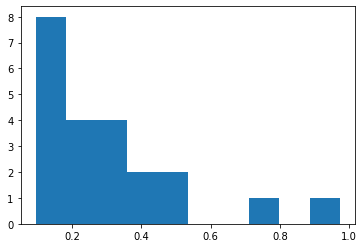

In [74]:
plt.hist(df2['Similarity'])